In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":10,
    "n_white_vehicle":4,
    "n_white_drone":3},
    "init":"random"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":4,
    "n_black_drone":2},
    "init":"random"
  }
}

In [3]:
sim = Environment(config, shape=(50,50))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

HOLLYWOOD     <plato.entity.infantry.Infantry object at 0x11000ad10>
WHISKEY       <plato.entity.infantry.Infantry object at 0x10ff2ed10>
BERLIN        <plato.entity.infantry.Infantry object at 0x11000afd0>
URBANA        <plato.entity.infantry.Infantry object at 0x11001a4d0>
LIMA          <plato.entity.infantry.Infantry object at 0x11001af90>
IPSWICH       <plato.entity.infantry.Infantry object at 0x11001da90>
FOXTROT       <plato.entity.infantry.Infantry object at 0x11001f590>
NEWYORK       <plato.entity.infantry.Infantry object at 0x110020090>
DENVER        <plato.entity.infantry.Infantry object at 0x110020b50>
STUTTGART     <plato.entity.infantry.Infantry object at 0x110022650>
MILWAUKEE     <plato.entity.vehicle.Vehicle object at 0x110025150>
CALEXICO      <plato.entity.vehicle.Vehicle object at 0x110028950>
SEAGULL       <plato.entity.vehicle.Vehicle object at 0x11002b5d0>
STOCKDALE     <plato.entity.vehicle.Vehicle object at 0x110026490>
HYANNIS       <plato.entity.drone.Drone ob

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x110030f10>
unknown_1     <plato.entity.infantry.Infantry object at 0x110030f50>
unknown_2     <plato.entity.infantry.Infantry object at 0x110031a50>
unknown_3     <plato.entity.infantry.Infantry object at 0x110032550>
unknown_4     <plato.entity.infantry.Infantry object at 0x110034050>
unknown_5     <plato.entity.vehicle.Vehicle object at 0x110037610>
unknown_6     <plato.entity.vehicle.Vehicle object at 0x11003a290>
unknown_7     <plato.entity.vehicle.Vehicle object at 0x110034b10>
unknown_8     <plato.entity.vehicle.Vehicle object at 0x110037650>
unknown_9     <plato.entity.drone.Drone object at 0x10f562050>
unknown_10    <plato.entity.drone.Drone object at 0x11003f590>


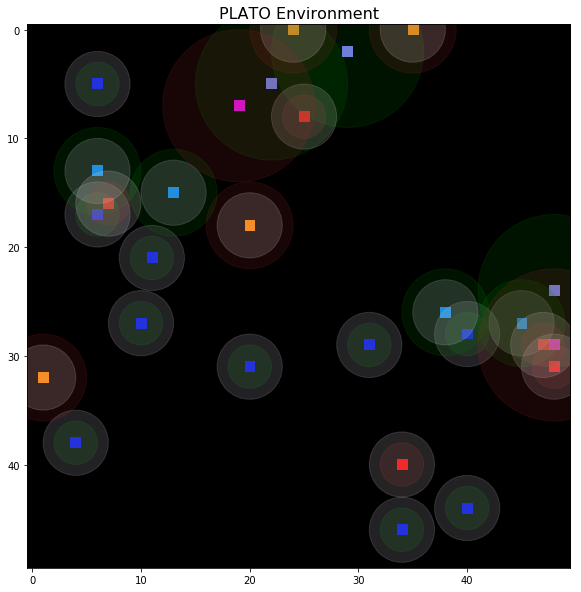

In [7]:
canvas = sim.render()

In [8]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 50, 50)

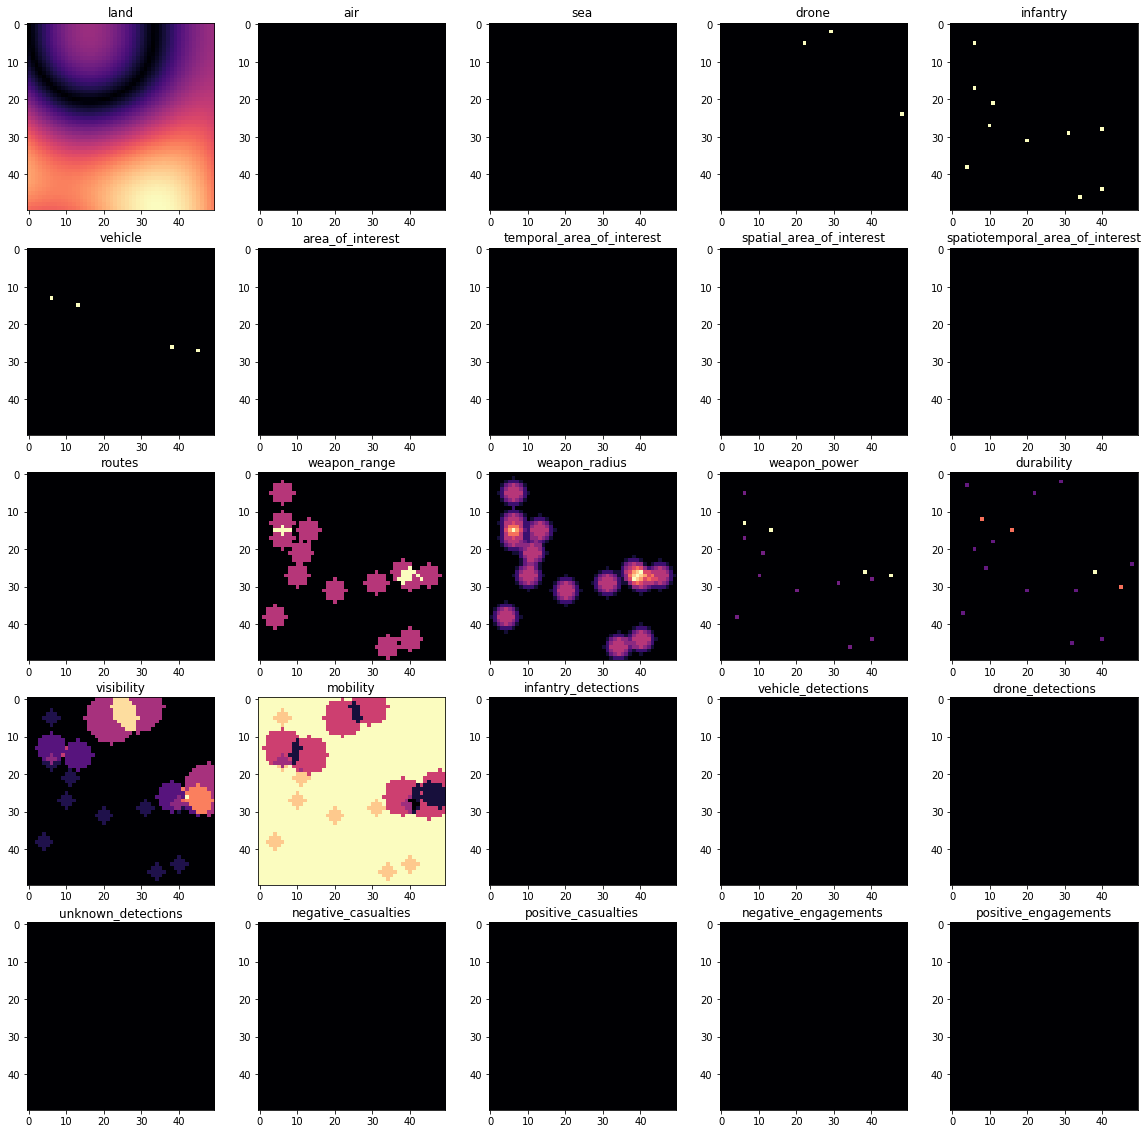

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

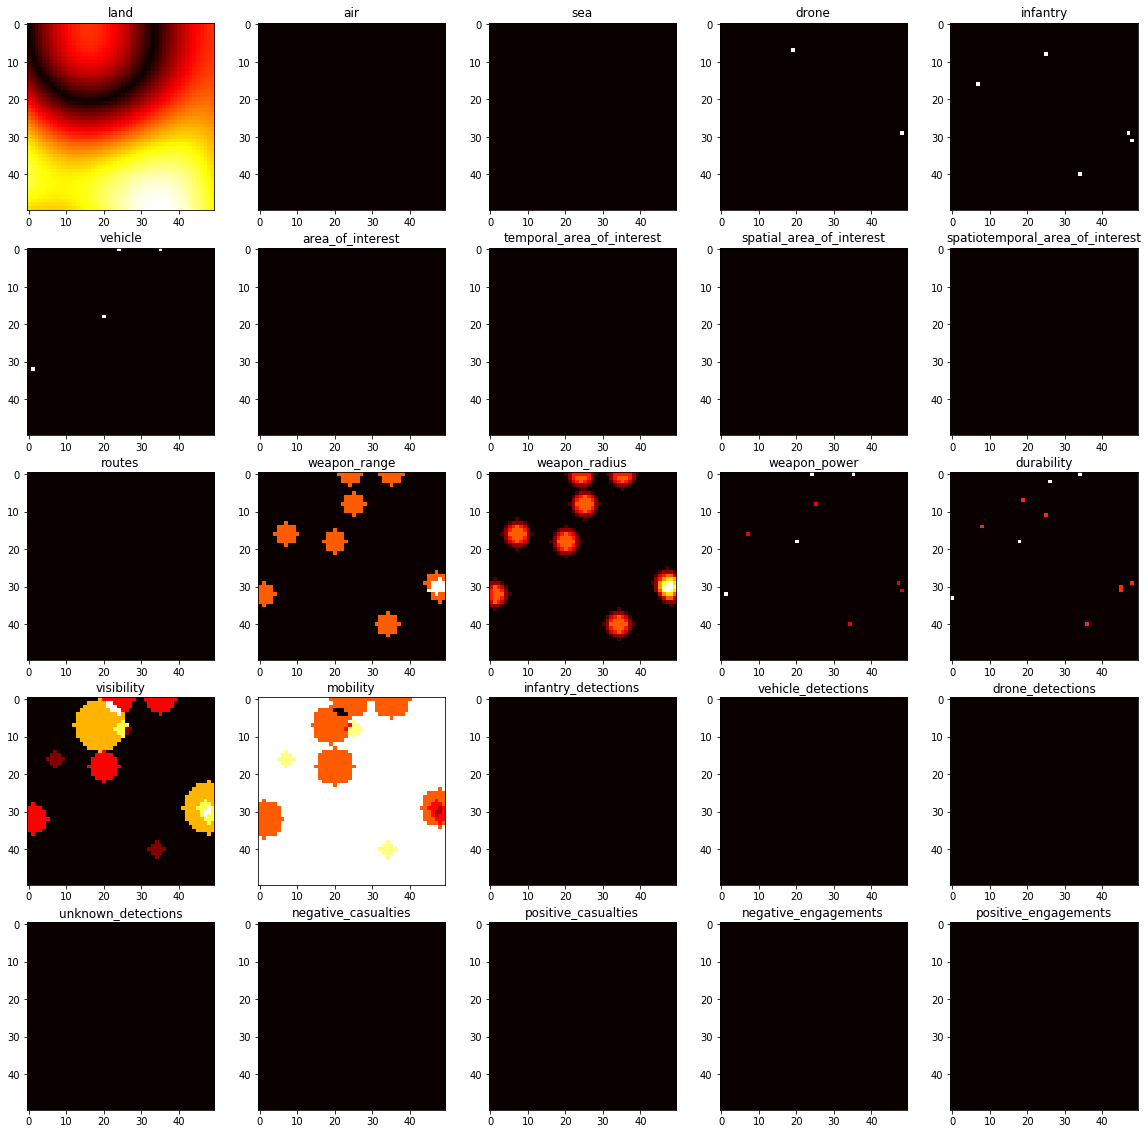

In [10]:
minimap = sim.observation(sim.blacks, negative=None)
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='hot')
mp.show()